In [1]:
# to enable imports from parent package
import sys
import os
from pathlib import Path
parent_dir = Path(os. getcwd()).parent.absolute()
sys.path.append(str(parent_dir))

import pandas as pd
import numpy as np
import seaborn as sns
from datasets import get_dataset_split


train_split, valid_split, test_split = get_dataset_split("ogbg-molhiv", root="../data")

splits = {
    "train": train_split,
    "valid": valid_split,
    "test": test_split,
}

In [2]:
labels = {
    "split": [],
    "id": [],
    "label": [],
    "num_nodes": [],
    "num_edges": [],
}

for split_name, split in splits.items():
    for graph in split:
        labels["split"].append(split_name)
        labels["id"].append(graph.id.item())
        labels["label"].append(graph.y.item())
        labels["num_nodes"].append(graph.num_nodes)
        assert graph.num_edges%2 == 0
        labels["num_edges"].append(int(graph.num_edges/2))

labels = {key: np.array(val) for key, val in labels.items()}
labels = pd.DataFrame(data=labels)

(<Axes: xlabel='num_nodes', ylabel='Count'>, 0.0025287524010990346)

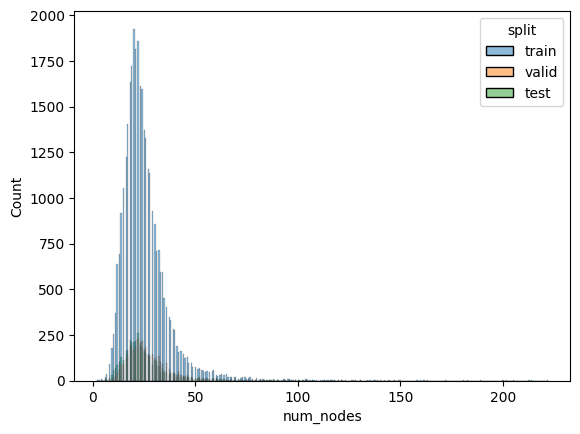

In [3]:
import seaborn as sns

f = sum(n>100 for n in labels["num_nodes"]) / len(labels["num_nodes"])
sns.histplot(x="num_nodes", hue="split", data=labels), f

In [5]:
some_graph = train_split[0]
num_atom_features = some_graph.x.shape[-1]
num_bond_features = some_graph.edge_attr.shape[-1]

atom_feature_map = {
    0: "atomic_num",
    1: "chiral_tag",
    2: "degree",
    3: "formal_charge",
    4: "num_h",
    5: "num_rad_electrons",
    6: "hybridization",
    7: "is_aromatic",
    8: "in_ring",
}
rev_atom_feature_map = {val: key for key, val in atom_feature_map.items()}

bond_feature_map = {
    0: "bond_type",
    1: "stereo",
    2: "is_conjugated",
}
rev_bond_feature_map = {val: key for key, val in bond_feature_map.items()}

atom_features = {
    "split": [],
    "id": [],
} | {feat: [] for feat in atom_feature_map.values()}
bond_features = {
    "split": [],
    "id": [],
} | {feat: [] for feat in bond_feature_map.values()}

for split_name, split in splits.items():
    for graph in split:
        atom_features["split"].append(np.repeat(split_name, graph.num_nodes))
        atom_features["id"].append(np.repeat(graph.id, graph.num_nodes))
        for i in range(num_atom_features):
            atom_features[atom_feature_map[i]].append(graph.x[:,i])

        bond_features["split"].append(np.repeat(split_name, graph.num_edges))
        bond_features["id"].append(np.repeat(graph.id, graph.num_edges))
        for i in range(num_bond_features):
            bond_features[bond_feature_map[i]].append(graph.edge_attr[:,i])


atom_features = {key: np.concatenate(val) for key, val in atom_features.items()}
bond_features = {key: np.concatenate(val) for key, val in bond_features.items()}
atom_features = pd.DataFrame(data=atom_features)
bond_features = pd.DataFrame(data=bond_features)


In [ ]:
# all atom features
total_atom_feat = len(atom_features)
occuring_atom_feat = {}
for idx, feat in atom_feature_map.items():
    count = atom_features[feat].value_counts()
    count = count[count>0]
    print(count)
    occuring_atom_feat[idx] = list(count.keys())


# for key, ls in occuring_atom_feat.items():
#     print(f"'{atom_feature_map[key]}': {len(ls)}")

atomic_num
5     761155
7     144737
6     100979
15     18731
16     10229
8       6452
14      2124
34      1997
52       526
13       484
10       435
33       161
49       160
28       118
26       116
4        116
27        77
25        65
77        55
45        46
29        39
32        36
18        35
31        31
41        27
24        25
44        22
76        20
79        17
23        15
73        11
82        11
43        11
78        11
50         8
2          8
30         8
0          7
81         7
74         6
51         6
12         5
80         5
11         5
46         5
19         3
21         3
91         3
39         3
22         2
64         1
88         1
54         1
66         1
63         1
Name: count, dtype: int64
chiral_tag
0    1049163
Name: count, dtype: int64
degree
3     570336
4     260192
2     116266
1     101032
5        528
0        508
6        248
9         21
7         14
8         14
10         4
Name: count, dtype: int64
formal_charge
5    103

In [10]:
# frequent (>0.01%) atom features
total_atom_feat = len(atom_features)
coverage = 1
frequent_atom_feat = {}
for idx, feat in atom_feature_map.items():
    count = atom_features[feat].value_counts()/total_atom_feat
    count = count[count>0.0001]
    # print(count)
    coverage = coverage*sum(count.values)
    frequent_atom_feat[idx] = list(count.keys())

frequent_atom_feat

count = 1
for val in frequent_atom_feat.values():
    count *= len(val)
count, coverage, frequent_atom_feat

# for key, ls in frequent_atom_feat.items():
#     print(f"'{atom_feature_map[key]}': {len(ls)}")

(75264,
 0.9992566346544379,
 {0: [5, 7, 6, 15, 16, 8, 14, 34, 52, 13, 10, 33, 49, 28, 26, 4],
  1: [0],
  2: [3, 4, 2, 1, 5, 0, 6],
  3: [5, 6, 4, 3, 1, 8, 2],
  4: [0, 1, 2, 3],
  5: [0],
  6: [1, 2, 0, 5, 3, 4],
  7: [0, 1],
  8: [1, 0]})

In [18]:
total_bond_feat = len(bond_features)
coverage = 1
frequent_bond_feat = {}
for idx, feat in bond_feature_map.items():
    count = bond_features[feat].value_counts()/total_bond_feat
    count = count[count>0.001]
    print(count)
    coverage = coverage*sum(count.values)
    frequent_bond_feat[idx] = list(count.keys())

count = 1
for val in frequent_bond_feat.values():
    count *= len(val)
count, coverage, frequent_bond_feat

bond_type
0    0.490681
3    0.417635
1    0.087642
2    0.004042
Name: count, dtype: float64
stereo
0    1.0
Name: count, dtype: float64
is_conjugated
1    0.63133
0    0.36867
Name: count, dtype: float64


(8, 1.0, {0: [0, 3, 1, 2], 1: [0], 2: [1, 0]})

In [5]:
frequent_atom_feat_idx = [(key, x) for key, xs in frequent_atom_feat.items() for x in xs]
frequent_atom_feat_idx

[(0, 5),
 (0, 7),
 (1, 0),
 (2, 3),
 (2, 4),
 (2, 2),
 (3, 5),
 (4, 0),
 (4, 1),
 (4, 2),
 (5, 0),
 (6, 1),
 (6, 2),
 (7, 0),
 (7, 1),
 (8, 1),
 (8, 0)]